In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop(columns=['Outcome'] , axis = 1)

In [5]:
y = df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(6,4) , random_state=7, verbose=False, learning_rate_init=0.01)

In [8]:
mlp.fit(x_train,y_train)
mlp.loss_curve_

/home/sal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[6.399764144020933,
 3.361392593138585,
 2.3375120767137183,
 1.7572006781208864,
 1.7782495976313346,
 1.617462401227505,
 1.353461954513761,
 1.158221589379452,
 1.1293312126533173,
 1.1101587375776476,
 1.0382184742526837,
 0.9346244816583958,
 0.8736719499343643,
 0.8397906192397192,
 0.8047741279599357,
 0.7641770742091958,
 0.7281764624574382,
 0.7029612557405834,
 0.6870941514383996,
 0.6724237923286098,
 0.6622243807519302,
 0.6594743046224276,
 0.6593511716906904,
 0.6574121016497025,
 0.6564043263927652,
 0.6553676884454626,
 0.6538221342360026,
 0.6530708908481536,
 0.6517842261474894,
 0.6517053435192863,
 0.6507309455809133,
 0.6506061442270997,
 0.6502463883097921,
 0.6495273714658163,
 0.6497693111157173,
 0.6495423946117,
 0.6487975309330144,
 0.6484260068210913,
 0.6484222203485512,
 0.6483486278624564,
 0.6478116739884686,
 0.6472940322164675,
 0.6468161527045313,
 0.646691089801225,
 0.6464550489768323,
 0.6461641328693313,
 0.6459940972028323,
 0.645617810801442,
 0

In [9]:
x_train.shape

(537, 8)

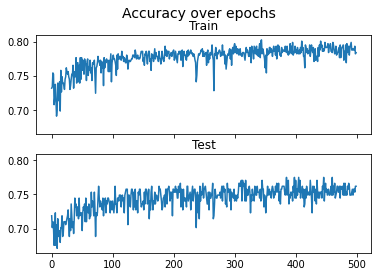

In [10]:
import numpy as np
import matplotlib.pyplot as plt

TRAIN_SAMPLES = x_train.shape[0]
EPOCHS = 500
BATCH = 128
CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
epoch = 0

while epoch < EPOCHS:
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index+BATCH]
        mlp.partial_fit(x_train.iloc[indices],y_train.iloc[indices],classes=CLASSES)
        mini_batch_index += BATCH
        
        if mini_batch_index >= TRAIN_SAMPLES:
            break
    
    scores_train.append(mlp.score(x_train,y_train))
    scores_test.append(mlp.score(x_test,y_test))
    epoch += 1
    
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

In [11]:
pred = mlp.predict(x_test)

In [12]:
accuracy_score(y_test,pred)

0.7619047619047619

In [13]:
def make_predictions(datapoint):
    x = mlp.predict(datapoint)
    if x == 1:
        print('Patient has diabetes')
    else:
        print('Patient does not has diabetes')

In [14]:
make_predictions([[1,85,66,29,0,26.6,0.351,31]])

Patient does not has diabetes


/home/sal/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
